На сколько спрогрессирует заболевание через год

In [2]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()

In [3]:
# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)

print(type(diabetes['data']))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
diabetes['data'].columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [ ]:
print(list(diabetes))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [ ]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabetes['data'])

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

In [ ]:
print(diabetes['target'][:20])

0     151.0
1      75.0
2     141.0
3     206.0
4     135.0
5      97.0
6     138.0
7      63.0
8     110.0
9     310.0
10    101.0
11     69.0
12    179.0
13    185.0
14    118.0
15    171.0
16    166.0
17    144.0
18     97.0
19    168.0
Name: target, dtype: float64


In [ ]:
import seaborn as sns

In [ ]:
type(diabetes['data'])

pandas.core.frame.DataFrame

In [ ]:
df_diabetes = diabetes['data']
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
df_diabetes['target'] = diabetes['target']

<AxesSubplot:>

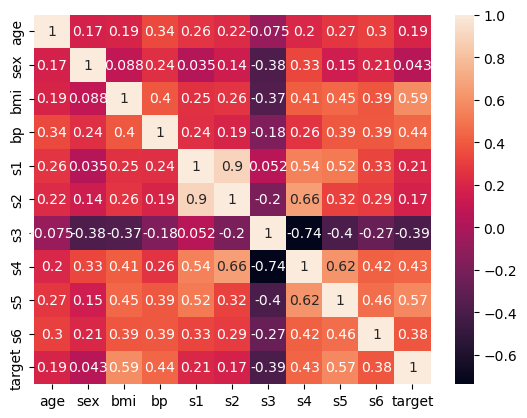

In [ ]:
sns.heatmap(df_diabetes.corr(), annot = True)

<AxesSubplot:xlabel='bp', ylabel='target'>

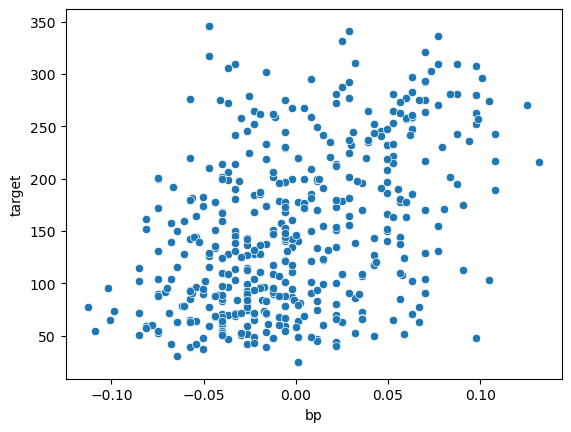

In [ ]:
sns.scatterplot(data=df_diabetes, x="bp", y="target")

<AxesSubplot:xlabel='age', ylabel='target'>

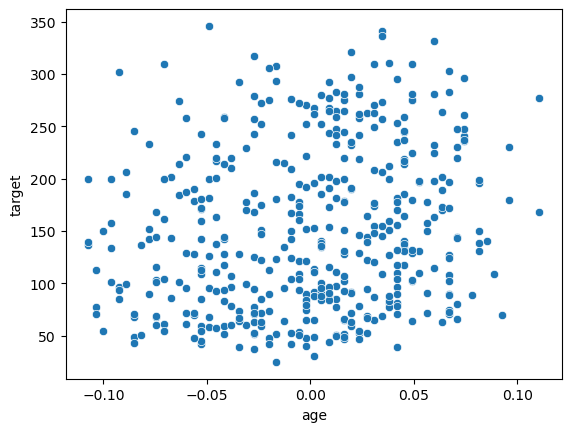

In [ ]:
sns.scatterplot(data=df_diabetes, x="age", y="target")

<AxesSubplot:xlabel='s4', ylabel='target'>

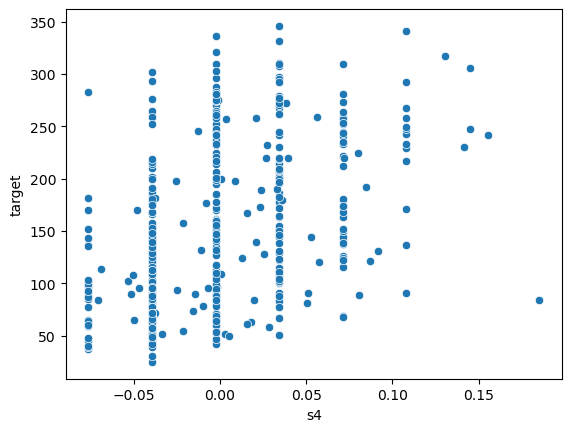

In [ ]:
sns.scatterplot(data=df_diabetes, x="s4", y="target")

<AxesSubplot:xlabel='s5', ylabel='target'>

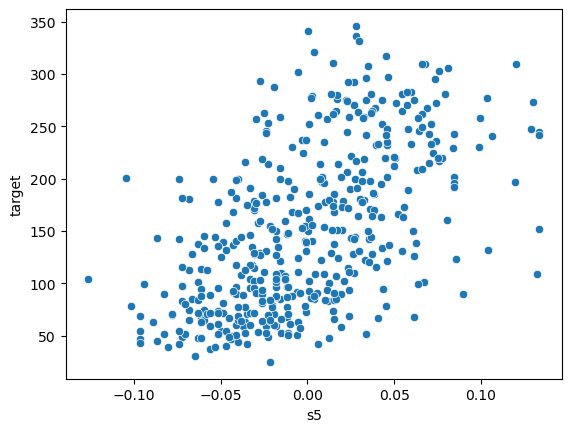

In [ ]:
sns.scatterplot(data=df_diabetes, x="s5", y="target")

<AxesSubplot:xlabel='s3', ylabel='target'>

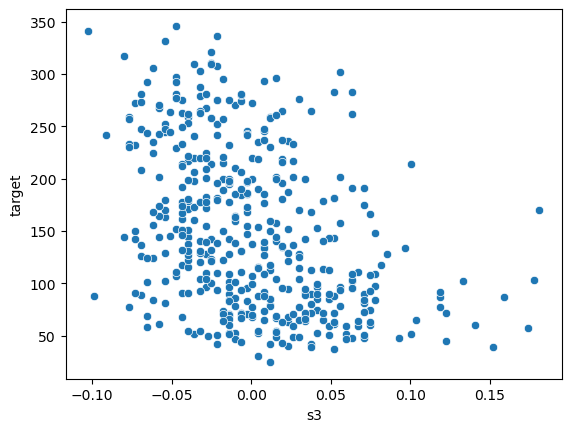

In [ ]:
sns.scatterplot(data=df_diabetes, x="s3", y="target")

Строим модель

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(diabetes['data'].drop(['target'], axis=1), diabetes['target'], test_size=0.25)
reg = LinearRegression().fit(X_train, y_train)
y_prediction = reg.predict(X_test)
mean_absolute_error(y_test,y_prediction)

39.740845921367765

Выбросим сильно скоррелированные фичи

In [ ]:
reg = LinearRegression().fit(X_train.drop(['s3','s2'], axis=1), y_train) # + 's4'
y_prediction = reg.predict(X_test.drop(['s3','s2'], axis=1))
mean_absolute_error(y_test,y_prediction)

39.39332851095789

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regrforest = RandomForestRegressor()
regrforest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_prediction = regrforest.predict(X_test)
mean_absolute_error(y_test,y_prediction)

46.152702702702705

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catboostreg = CatBoostRegressor(iterations=500)
catboostreg.fit(X_train, y_train)

Learning rate set to 0.060402
0:	learn: 75.7963077	total: 141ms	remaining: 1m 10s
1:	learn: 74.4010477	total: 143ms	remaining: 35.6s
2:	learn: 72.8159483	total: 145ms	remaining: 24.1s
3:	learn: 71.3600143	total: 147ms	remaining: 18.3s
4:	learn: 69.7751361	total: 149ms	remaining: 14.8s
5:	learn: 68.2822056	total: 152ms	remaining: 12.5s
6:	learn: 67.1313252	total: 154ms	remaining: 10.8s
7:	learn: 66.1192467	total: 155ms	remaining: 9.56s
8:	learn: 64.8758753	total: 157ms	remaining: 8.58s
9:	learn: 63.8135809	total: 159ms	remaining: 7.79s
10:	learn: 62.8324411	total: 161ms	remaining: 7.15s
11:	learn: 61.7880832	total: 163ms	remaining: 6.62s
12:	learn: 60.9907154	total: 165ms	remaining: 6.16s
13:	learn: 60.2610163	total: 167ms	remaining: 5.78s
14:	learn: 59.4851033	total: 168ms	remaining: 5.44s
15:	learn: 58.7775063	total: 170ms	remaining: 5.15s
16:	learn: 58.1398395	total: 172ms	remaining: 4.89s
17:	learn: 57.4802604	total: 174ms	remaining: 4.66s
18:	learn: 56.9552811	total: 176ms	remainin

In [ ]:
y_prediction = catboostreg.predict(X_test)
mean_absolute_error(y_test,y_prediction)

45.5080181591242

In [ ]:
y_train.mean()

153.4592145015106

In [ ]:
mean_absolute_error(y_test,[y_train.mean()]*len(X_test))

64.56969053645791

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(regrforest, f)

In [ ]:
with open("model.pkl", "rb") as f:
    model_forest = pickle.load(f)
mean_absolute_error(y_test,model_forest.predict(X_test))

46.152702702702705

Подготовим данные для кафки

In [ ]:
# Load the dataset
diabetes['data'].iloc[0]

age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019908
s6         -0.017646
target    151.000000
Name: 0, dtype: float64

In [ ]:
dict(diabetes['data'].iloc[0])

{'age': 0.0380759064334241,
 'sex': 0.0506801187398187,
 'bmi': 0.0616962065186885,
 'bp': 0.0218723549949558,
 's1': -0.0442234984244464,
 's2': -0.0348207628376986,
 's3': -0.0434008456520269,
 's4': -0.00259226199818282,
 's5': 0.0199084208763183,
 's6': -0.0176461251598052,
 'target': 151.0}